### 라이브러리 불러오기

<Axes: >

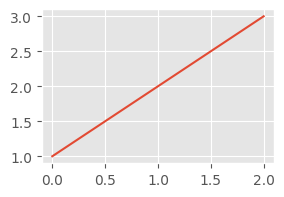

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.style.use('ggplot')
pd.Series([1,2,3]).plot(figsize=(3,2))

In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


## 데이터 불러오기

In [3]:
df = pd.read_csv('./data/advertising(in).csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
# 상위 5개의 행 확인
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## 데이터 이해

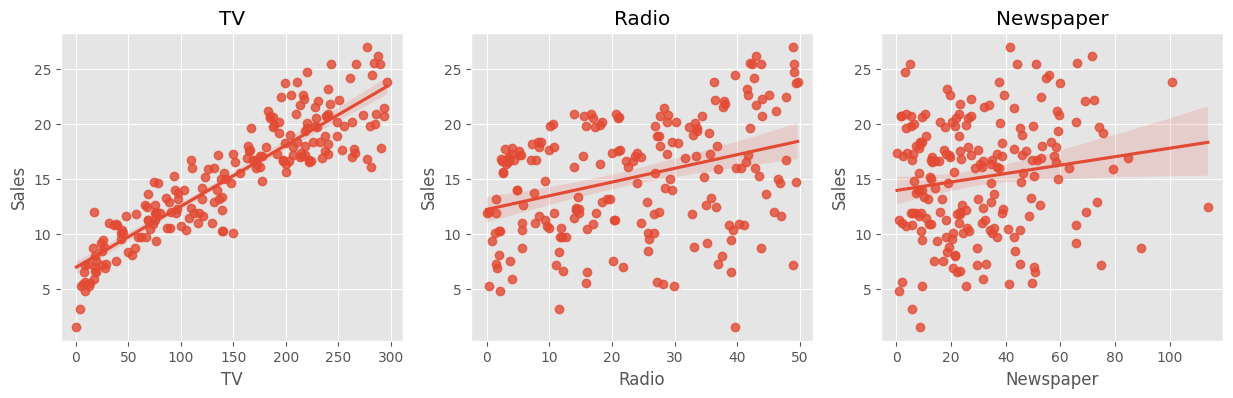

In [5]:
#그래프 크기
plt.figure(figsize=(15,4))

#tv 광고비에 따른 판매량
plt.subplot(1, 3, 1)
sns.regplot(data=df, x = 'TV', y = 'Sales')
plt.title('TV')

#Radio 광고비에 따른 판매량
plt.subplot(1, 3, 2)
sns.regplot(data=df, x = 'Radio', y = 'Sales')
plt.title('Radio')

#Newspaper 광고비에 따른 판매량
plt.subplot(1, 3, 3)
sns.regplot(data=df, x = 'Newspaper', y = 'Sales')
plt.title('Newspaper')

#그래프 그리기
plt.show()

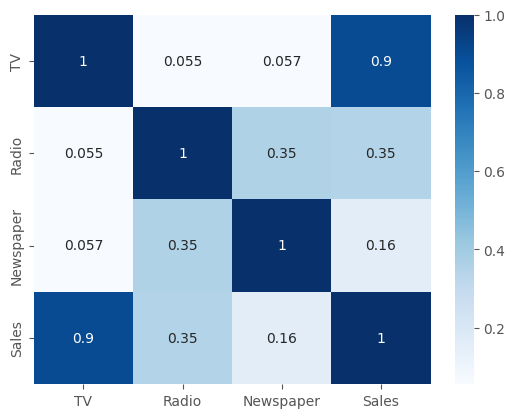

In [6]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.show()

## Linear Regression

#### 변수 선택
TV는 독립변수 X, Sales는 종속변수 y

In [7]:
X = df[['TV']] # 독립변수는 2차원이어야 함
y = df['Sales']

df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


#### 훈련 세트, 테스트 세트 분할
X의 훈련, 테스트, y의 훈련,테스트로 분할

In [8]:
train_test_split?

Object `train_test_split` not found.


디폴트는 Shuffel: 데이터를 섞어서 나눠줌
디폴트 값
test_size = 0.25
train_size = 0.75

In [9]:
# 훈련세트, 테스트세트 분할
from sklearn.model_selection import train_test_split

# Randomstate를 설정하여 결과 값이 같게
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.25)

# 2차원 데이터가 X
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(150, 1) (50, 1) (150,) (50,)


Text(0.5, 1.0, 'train_test split')

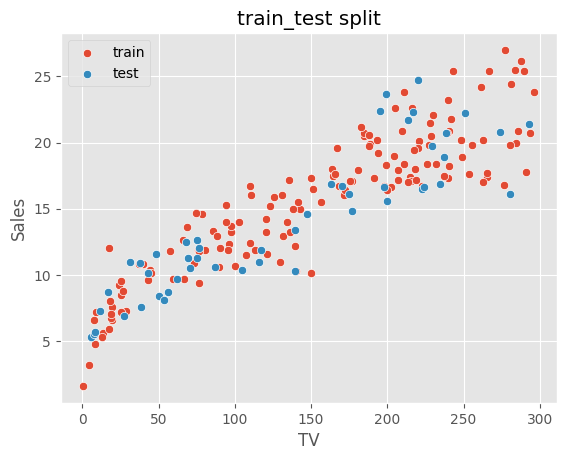

In [10]:
# 훈련세트, 테스트 세트 분할 확인(시각화)
sns.scatterplot(x=X_train['TV'], y=y_train, label = "train")
sns.scatterplot(x=X_test['TV'], y=y_test, label = "test")

# seaborn은 legend 없어도 됨, matplotlib은 있어야 함
plt.legend()
plt.title("train_test split")

### 모델 학습

#### 모델 생성 및 훈련

In [12]:
# LinearRegression 클래스 import
from sklearn.linear_model import LinearRegression

# 모델 생성하기
model = LinearRegression()

# 훈련데이터로 모델 훈련하기
# 훈련 함수는 fit인 경우가 많음
# y_train이 label
model.fit(X_train, y_train)

LinearRegression()

### 모델 테스트

#### 테스트세트로 평가

In [19]:
# sklearn.metrics 에 모델 평가를 위한 함수가 가 있음
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

# 테스트 데이터의 예측값
pred = model.predict(X_test)

# 실제값과 예측값 비교
# print(f'예측값\n {pred}')
# print(f'실제값\n {y_test}')

# 예측값과 실제값의 차이(Loss/Error) 이용한 모델 평가
mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
print(f'MSE : {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE : {mae:.2f}')
print(f'R2 : {r2:.2f}')


예측값
 [16.14347417 17.92138181 23.32156857  7.74687609 19.30050643 11.25838215
 19.10665357  9.86818022 19.41681814 16.79703523  8.8435294  10.21157671
 20.08699517  7.39794095 14.82527473 16.52564123  7.50317536 18.04323218
 11.26945945 20.24761611 19.81006251 10.85406047  9.20354185 20.99533427
 10.92052431 10.06203308 18.92387802 14.81419743 11.92855917  7.56410054
 18.16508254 10.93160162 18.11523467  8.03488605 22.64585289 20.29192533
  9.77402312 22.25814718 13.5901551   8.62198328 13.52369126 16.90226964
  9.48601316 10.54943455 19.50543659  9.21461916 11.00914276 15.25728968
 12.89228481 11.32484598]
실제값
 95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    16.5
45     16.1
66     11.0
182     8.7
165    16.9
78      5.3
186    10.3
177    16.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65     11.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      15.6
18     1

실제값과 모델의 예측값 비교